In [3]:
# Import necessary modules.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, confusion_matrix, classification_report, ConfusionMatrixDisplay
import biscuit_dunking_functions as pf2

# Reading in data

In [14]:
dunking_data = pd.read_csv('dunking-data.csv')
dunking_data.head()

,gamma,phi,eta,L,t,biscuit
0,0.073897,1.333006,0.000999,0.011196,19.362214,Digestive
1,0.080946,1.476758,0.001012,0.005894,11.852589,Digestive
2,0.087408,1.477141,0.000984,0.009249,24.793669,Digestive
3,0.070793,1.502001,0.001002,0.003774,16.292780,Hobnob
4,0.058917,1.548274,0.001004,0.002291,13.662271,Hobnob


In [16]:
micro_measure = pd.read_csv('microscopy-data.csv')
micro_measure.head()

,gamma,phi,eta,L,t,r
0,0.084596,1.557367,0.000981,0.003221,24.231107,7.453712e-07
1,0.064291,1.538842,0.000998,0.002395,22.169765,2.600680e-07
2,0.086224,1.546138,0.001008,0.003036,23.257709,3.734618e-07
3,0.082859,1.566878,0.000997,0.001261,12.717432,7.567173e-07
4,0.090832,1.570229,0.001002,0.000576,15.189146,8.239067e-07


In [18]:
time_resolve_1 = pd.read_csv('tr-1.csv')
time_resolve_1.head()

,t,L,dL
0,30.000000,0.008087,0.000392
1,32.727273,0.008253,0.000270
2,35.454545,0.008607,0.000501
3,38.181818,0.008920,0.000267
4,40.909091,0.009604,0.000274


In [20]:
time_resolve_2 = pd.read_csv('tr-2.csv')
time_resolve_2.head()

,t,L,dL
0,30.000000,0.005809,0.000228
1,32.727273,0.006243,0.000514
2,35.454545,0.006394,0.000393
3,38.181818,0.006601,0.000323
4,40.909091,0.006822,0.000566


In [22]:
time_resolve_3 = pd.read_csv('tr-3.csv')
time_resolve_3.head()

,t,L,dL
0,30.000000,0.011187,0.000371
1,32.727273,0.011566,0.000609
2,35.454545,0.011942,0.000809
3,38.181818,0.012502,0.000614
4,40.909091,0.013343,0.000480


# Can a machine learning algorithm identify the different types of biscuits?

Using a random forest classifier and dunking-data.csv file.

In [24]:
# Features (independent variables).
X = dunking_data[['gamma', 'phi', 'eta', 'L', 't']]
# Target (biscuit type).
y = dunking_data['biscuit']
# Convert biscuit type to numerical labels.
y = y.astype('category').cat.codes # Rich Tea = 0, Hobnob = 1, Digestive = 2.

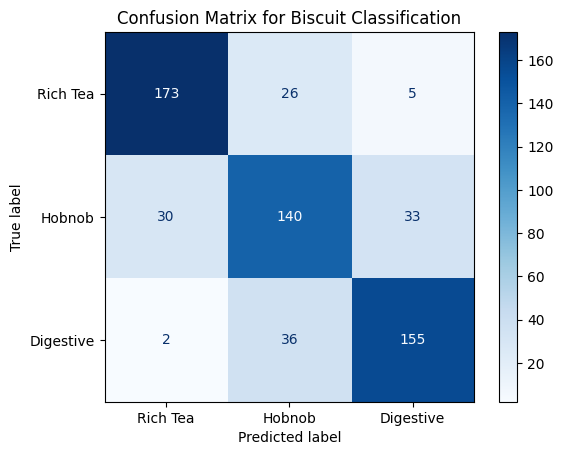

Accuracy: 0.78
              precision    recall  f1-score   support

    Rich Tea       0.84      0.85      0.85       204
      Hobnob       0.69      0.69      0.69       203
   Digestive       0.80      0.80      0.80       193

    accuracy                           0.78       600
   macro avg       0.78      0.78      0.78       600
weighted avg       0.78      0.78      0.78       600



In [26]:
# Apply classifier function.
pf2.classifier(X, y)

This can be used to reveal key physical and structural properties that distinguish the biscuits. This suggests biscuits have unique, measureable characteristics that influence absorption. Biscuits differ in structure, speed, and composition. 84% of Rich Tea biscuits were correctly classified, 69% of Hobnobs were correctly classified, and 80% of Digestives were correctly classified. Suggesting, Rich Teas and Digestives have distinct absorption properties and Hobnobs may share absorption properties with the other biscuits, the dataset may not have enough examples of Hobnobs?

# Which biscuit absorbs tea the fastest?

Ranks biscuits based on absorption rate. 

In [32]:
# Compute absorption rate (L / t).
dunking_data['absorption_rate'] = dunking_data['L'] / dunking_data['t']

# Rank biscuits by absorption rate, returning the mean average for each biscuit.
rankings = dunking_data.groupby('biscuit')['absorption_rate'].mean().sort_values(ascending=False)
print(rankings)

biscuit
Digestive    0.000413
Hobnob       0.000317
Rich Tea     0.000259
Name: absorption_rate, dtype: float64


Uncovers key physical and structural properties that affect dunking performance, biscuit composition, and helps choose biscuits for optimal dunking. Structural and material differences for faster absorption: larger or more connected pores allows tea to flow faster and how well liquid moves through the biscuits structure. Digestives being the slowest suggests it has a denser structure with less open porosity. Faster absorption = more fragile (collapsing quickly), slower absorption = more durable (stay intact for longer).

# How is the pore radius different between the three types of biscuits?

First test done by merging microscopy-data.csv and dunking-data.csv files and plotting the data.

In [34]:
# Merge microscopy data with dunking data to get biscuit types and pore radius in one dataset.
micro_dunking = pd.merge(micro_measure, dunking_data, on=['gamma', 'phi', 'eta', 'L', 't'])
micro_dunking

,gamma,phi,eta,L,t,r,biscuit,absorption_rate
0,0.084596,1.557367,0.000981,0.003221,24.231107,7.453712e-07,Digestive,0.000133
1,0.064291,1.538842,0.000998,0.002395,22.169765,2.600680e-07,Rich Tea,0.000108
2,0.086224,1.546138,0.001008,0.003036,23.257709,3.734618e-07,Hobnob,0.000131
3,0.082859,1.566878,0.000997,0.001261,12.717432,7.567173e-07,Digestive,0.000099
4,0.090832,1.570229,0.001002,0.000576,15.189146,8.239067e-07,Digestive,0.000038
...,...,...,...,...,...,...,...,...
495,0.077699,1.481847,0.000989,0.006078,21.967531,4.751893e-07,Hobnob,0.000277
496,0.067776,1.488293,0.001011,0.006595,18.163634,8.798032e-07,Digestive,0.000363
497,0.074166,1.554817,0.000997,0.003041,18.000978,8.652230e-07,Digestive,0.000169
498,0.081415,1.439910,0.001011,0.009119,19.136713,8.128785e-07,Digestive,0.000477


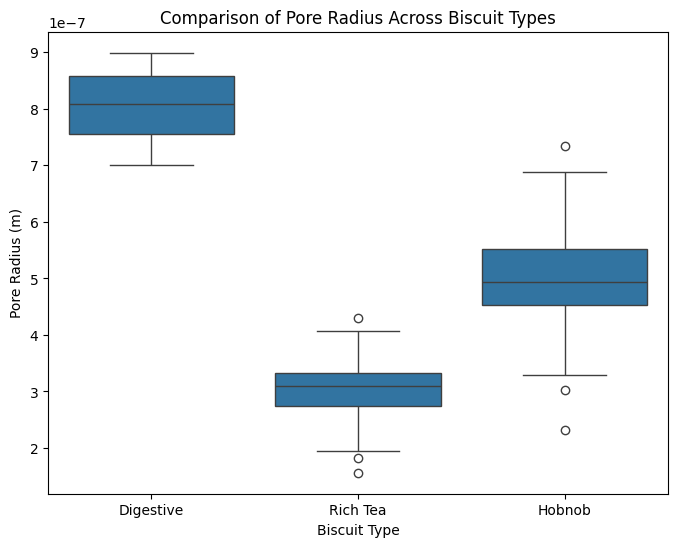

In [36]:
# Boxplot to compare pore raduis by biscuit type.
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x=micro_dunking['biscuit'], y=micro_dunking['r'])
ax.set(xlabel="Biscuit Type", ylabel="Pore Radius (m)", title="Comparison of Pore Radius Across Biscuit Types")
plt.show()

If the pore radius differs between biscuit types, it reveals important structural, material, and absorption properties that affect dunking behaviour. Large pores = faster absorption, likely more brittle structure, small pores = slower absorption, likely denser biscuit. Rich Tea biscuits had the smallest pores yet the fastest absorption, and Digestives had the largest pores yet slowest absorption, suggesting factors beyond just pore size affect absorption rate, such as porosity (Rich Tea might have more total pores per unit area, compensating for smaller size), structural swelling (Digestives may expand when wet, closing pores and slowing absorption).

Best biscuit for quick dunking = Rich Tea: absorbs fastest b ut might break easily if left in too long.

Most durable biscuit for dunking = Digestive: absorbs slowly, likely to stay intact longer in tea.

Balanced choice = Hobnob: moderate absorption speed and pore size, may have the best dunking durability.

# Can capillary flow predict pore radius?

Using the Washburn equation and tr-1.csv, ts-2.csv, tr-3.csv files to compute pore radius (r).

In [38]:
# Merge all time resolved datasets into one dataset.
time_resolve = pd.concat([time_resolve_1, time_resolve_2, time_resolve_3], ignore_index=True)
time_resolve

,t,L,dL
0,30.000000,0.008087,0.000392
1,32.727273,0.008253,0.000270
2,35.454545,0.008607,0.000501
3,38.181818,0.008920,0.000267
4,40.909091,0.009604,0.000274
...,...,...,...
295,289.090909,0.034766,0.000118
296,291.818182,0.034769,0.000341
297,294.545455,0.034655,0.000155
298,297.272727,0.034646,0.000481


In [40]:
# Apply function to estimate pore radius (r).
pf2.pore_rad_est(time_resolve)

,t,L,dL,r_est
0,30.000000,0.008087,0.000392,5.299585e-07
1,32.727273,0.008253,0.000270,5.059083e-07
2,35.454545,0.008607,0.000501,5.079106e-07
3,38.181818,0.008920,0.000267,5.066000e-07
4,40.909091,0.009604,0.000274,5.480791e-07


In [42]:
# Append time resolved dataset to include measured radius.
time_resolve['r'] = micro_measure['r']
time_resolve

,t,L,dL,r_est,r
0,30.000000,0.008087,0.000392,5.299585e-07,7.453712e-07
1,32.727273,0.008253,0.000270,5.059083e-07,2.600680e-07
2,35.454545,0.008607,0.000501,5.079106e-07,3.734618e-07
3,38.181818,0.008920,0.000267,5.066000e-07,7.567173e-07
4,40.909091,0.009604,0.000274,5.480791e-07,8.239067e-07
...,...,...,...,...,...
295,289.090909,0.034766,0.000118,1.016341e-06,3.164250e-07
296,291.818182,0.034769,0.000341,1.006982e-06,3.635748e-07
297,294.545455,0.034655,0.000155,9.911453e-07,5.276638e-07
298,297.272727,0.034646,0.000481,9.815560e-07,3.125432e-07


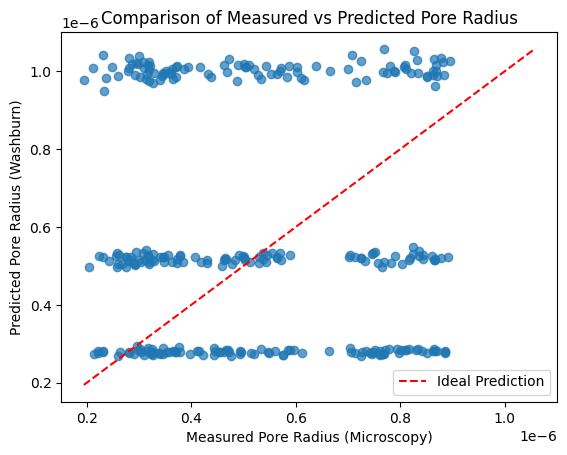

In [44]:
# Get minimum and maximum values for diagonal reference line.
min = min(time_resolve['r'].min(), time_resolve['r_est'].min())
max = max(time_resolve['r'].max(), time_resolve['r_est'].max())

# Scatterplot to show comparison of estimated and measured pore radius.
fig, ax = plt.subplots()
ax.scatter(time_resolve['r'], time_resolve['r_est'], alpha=0.7)
ax.set(xlabel="Measured Pore Radius (Microscopy)", ylabel="Predicted Pore Radius (Washburn)", title="Comparison of Measured vs Predicted Pore Radius")
ax.plot([min, max], [min, max], 'r--', label="Ideal Prediction") # Ideal prediction line (y = x).
plt.legend()
plt.show()

Points expected to fall close to red line, suggesting model accurately predicts pore radius. Deviations may suggest capillary effects beyond the model, such as pore wall roughness, inhomogeneous structures. Real-world biscuits have irregular pores. This suggests biscuit structure plays a bigger role than just pore size. 

# Time-series analysis of liquid absoroption

Using the tr-1.csv, tr-2.csv, tr-3.csv files to track how far tea soaks into a biscuit over time.

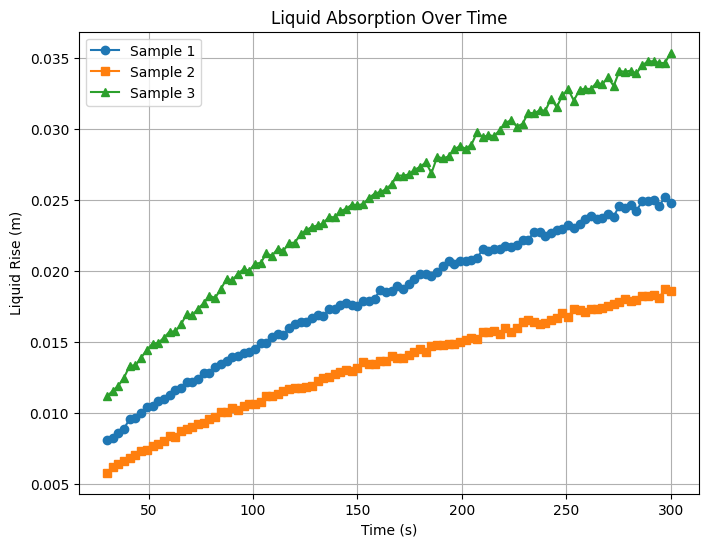

In [76]:
# Plot liquid rise over time 
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(time_resolve_1['t'], time_resolve_1['L'], label="Sample 1", marker='o')
ax.plot(time_resolve_2['t'], time_resolve_2['L'], label="Sample 2", marker='s')
ax.plot(time_resolve_3['t'], time_resolve_3['L'], label="Sample 3", marker='^')
ax.set(xlabel="Time (s)", ylabel="Liquid Rise (m)", title="Liquid Absorption Over Time")
plt.legend()
plt.grid(True)
plt.show()

How far tea soaks into biscuit over time, how quickly the biscuits absob tea, which biscuit absorbs the moast liquid, whether biscuits reach saturation (e.g. they stop absorbing), steeper = faster absorption = more porous biscuit (Hobnobs may absorb faster), flatter = slower absorption = denser biscuits (Digestives may be slower). Biscuits that absorb too fast might break apart quickly when dunked, slow absorbing biscuits could be better for sustained dunking, helps design "optimal dunking time" for each biscuit.

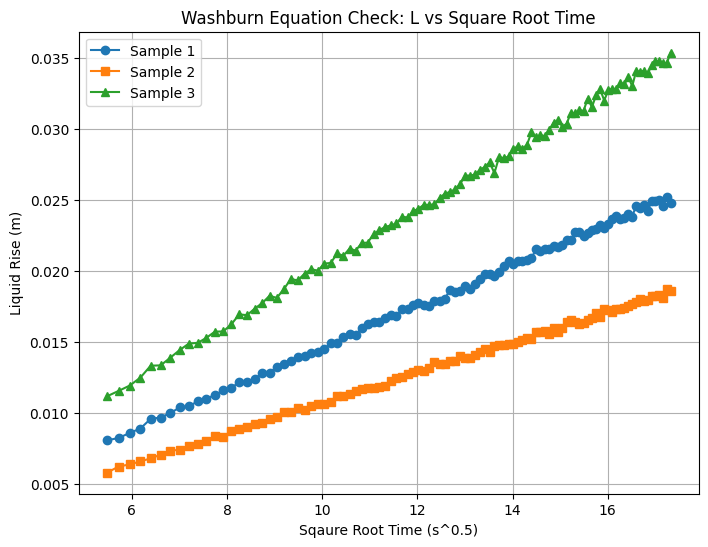

In [78]:
# Transform to square root scale to check Washburn equation (L vs sqrt(t)) 
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(np.sqrt(time_resolve_1['t']), time_resolve_1['L'], label="Sample 1", marker='o')
ax.plot(np.sqrt(time_resolve_2['t']), time_resolve_2['L'], label="Sample 2", marker='s')
ax.plot(np.sqrt(time_resolve_3['t']), time_resolve_3['L'], label="Sample 3", marker='^')
ax.set(xlabel="Sqaure Root Time (s^0.5)", ylabel="Liquid Rise (m)", title="Washburn Equation Check: L vs Square Root Time")
plt.legend()
plt.grid(True)
plt.show()

Straight lines = Washburn equation is a good fit in describing the biscuits capillary action. Could help in engineering biscuits with controlled absorption rates (e.g. for tea dunking optimisation).

In [92]:
# Compute absorption rate (finite difference method).
time_resolve_1['dL_dt'] = np.gradient(time_resolve_1['L'], time_resolve_1['t'])
time_resolve_2['dL_dt'] = np.gradient(time_resolve_2['L'], time_resolve_2['t'])
time_resolve_3['dL_dt'] = np.gradient(time_resolve_3['L'], time_resolve_3['t'])

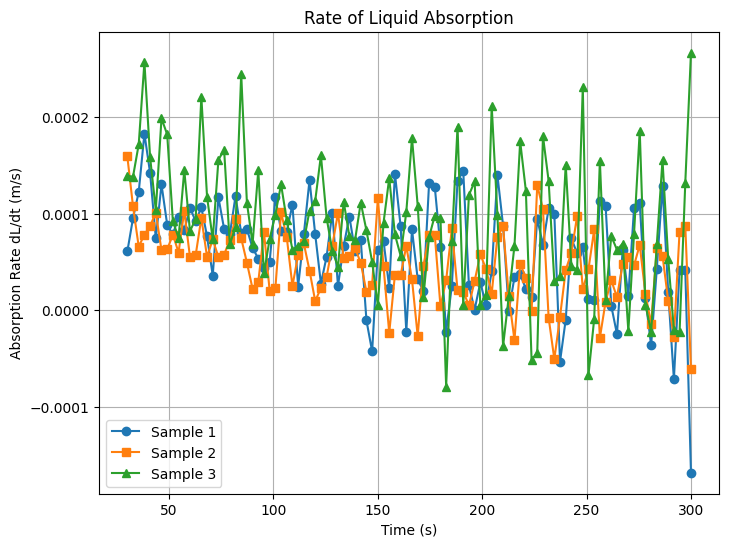

In [94]:
# Plot absorption rate over time.
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(time_resolve_1['t'], time_resolve_1['dL_dt'], label="Sample 1", marker='o')
ax.plot(time_resolve_2['t'], time_resolve_2['dL_dt'], label="Sample 2", marker='s')
ax.plot(time_resolve_3['t'], time_resolve_3['dL_dt'], label="Sample 3", marker='^')
ax.set(xlabel="Time (s)", ylabel="Absorption Rate dL/dt (m/s)", title="Rate of Liquid Absorption")
plt.legend()
plt.grid(True)
plt.show()

How fast the tea soaks into the biscuit at different times, if absorption slows down over time, whether biscuits breakdown quickly. Rapid absorption at the start, gradual decline = Washburn behaviour, capillary forces slowing over time. Helps define a "dunking time limit" before biscuit collapses, manufacturers could design biscuits that retain structure while absorbing liquid well, allows testing of anti-soggy coatings or improved biscuit structures.

# How accurate is the Washburn equation for biscuits, and can a machine learning regressor perform better?

Comparing washburn equation, a random forest regressor, and the actual data, using the merged microscopy-data.csv and dunking-data.csv files.

In [96]:
# Append microscopy data to include washburn equation outputs.
micro_dunking['washburn_eq'] = pf2.washburn_eq(micro_dunking['gamma'], micro_dunking['r'], micro_dunking['t'], micro_dunking['phi'], micro_dunking['eta'])
micro_dunking.head()

,gamma,phi,eta,L,t,r,biscuit,absorption_rate,washburn_eq
0,0.084596,1.557367,0.000981,0.003221,24.231107,7.453712e-07,Digestive,0.000133,0.003233
1,0.064291,1.538842,0.000998,0.002395,22.169765,2.600680e-07,Rich Tea,0.000108,0.002436
2,0.086224,1.546138,0.001008,0.003036,23.257709,3.734618e-07,Hobnob,0.000131,0.003027
3,0.082859,1.566878,0.000997,0.001261,12.717432,7.567173e-07,Digestive,0.000099,0.001251
4,0.090832,1.570229,0.001002,0.000576,15.189146,8.239067e-07,Digestive,0.000038,0.000567


In [103]:
# Features (independent variables).
X = micro_dunking[['gamma', 'phi', 'eta', 't', 'r']]
# Target (distance tea travelled up the biscuit (L) (m)).
y = micro_dunking['L']

Washburn Equation MSE: 0.000000
Regressor Model MSE: 0.000001


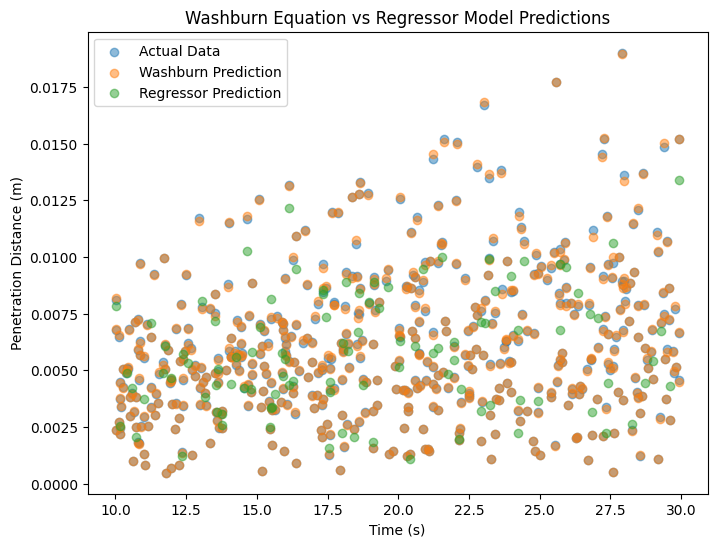

In [105]:
# Train regressor model and compare performance of regressor and Washburn against actual data.
pf2.regressor_washburn(X, y, micro_dunking)

Washburn's model is already optimal and extra complexity is not needed to predict tea absorption for biscuits. Biscuit absorption follows capillary flow theory very closely, with minimal external factors disrupting predictions, capillary action is the dominant mechanism.